## HW1 

Implement the Gradient Based Methods (not covered in the lecture, to be discussed in the seminar; see below for the algorithm) in the four arm bernoulli bandit example (Lecture 1, Page 28). 

- Set the termination time to 1000
- Number of trials = 20
- Consider three choices of $\eta$, corresponding to 0.1, 1 and 10
- Plot the average reward and regret for each choice of $\eta$

![gradient_based](./graphs/gradient_based_lecture.png)

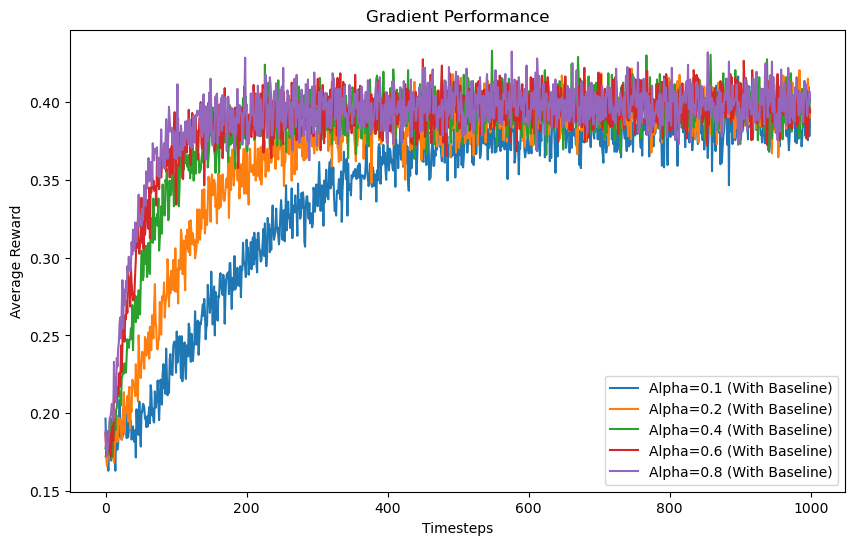

In [2]:
## your code here
import numpy as np
import matplotlib.pyplot as plt

def bandit_step(bandit_probabilities, action):
    if np.random.rand() < bandit_probabilities[action]:
        return 1
    else:
        return 0

def gradient_based(n_bandits, bandit_probabilities, alpha=0.1, timesteps=1000, trials=2000):
    
    rewards = np.zeros((trials, timesteps))  
    avg_rewards = np.zeros(timesteps) 
    
    for i in range(trials):
        preferences = np.zeros(n_bandits)  
        avg_reward = 0  
        action_counts = np.zeros(n_bandits)  
        
        for j in range(timesteps):
            exp_prefs = np.exp(preferences)
            action_probs = exp_prefs / np.sum(exp_prefs)
            
            
            action = np.random.choice(n_bandits, p=action_probs)
            
     
            reward = bandit_step(bandit_probabilities, action)
            rewards[i, j] = reward
            
           
           
            avg_reward += (reward - avg_reward) / (j + 1)
            
            for a in range(n_bandits):
                if a == action:
                    preferences[a] += alpha * (reward - avg_reward) * (1 - action_probs[a])
                else:
                    preferences[a] -= alpha * (reward - avg_reward) * action_probs[a]
   

    avg_rewards = np.mean(rewards, axis=0)
    return avg_rewards


bandit_probabilities = [0.1, 0.4, 0.1, 0.1] 


rewards_alpha_01 = gradient_based(len(bandit_probabilities), bandit_probabilities, alpha=0.1)
rewards_alpha_02 = gradient_based(len(bandit_probabilities), bandit_probabilities, alpha=0.2)
rewards_alpha_04 = gradient_based(len(bandit_probabilities), bandit_probabilities, alpha=0.4)
rewards_alpha_06 = gradient_based(len(bandit_probabilities), bandit_probabilities, alpha=0.6)
rewards_alpha_08 = gradient_based(len(bandit_probabilities), bandit_probabilities, alpha=0.8)

plt.figure(figsize=(10,6))
plt.plot(rewards_alpha_01, label="Alpha=0.1 (With Baseline)")
plt.plot(rewards_alpha_02, label="Alpha=0.2 (With Baseline)")
plt.plot(rewards_alpha_04, label="Alpha=0.4 (With Baseline)")
plt.plot(rewards_alpha_06, label="Alpha=0.6 (With Baseline)")
plt.plot(rewards_alpha_08, label="Alpha=0.8 (With Baseline)")

plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Gradient Performance")
plt.show()